In early 2023, streaming juggernaut and forefather Netflix announced updated measures to prevent the sharing of individual accounts between two or more consumers. Despite Netflix's supposed reputation as the premier streaming service, executives thought it necessary to ensure further profit by terminating this popular feature. This project aims to analyze Netflix's public financial data to determine if there is an observable cause for this change. 

We start by importing the pandas package. This will be the only external package needed to run this program. 

In [ ]:
import pandas as pd

There are two separate databases needed for this analysis. The first is called "revenue" and contains data on the historical total revenue, cost of operation, and gross profit (final amount of money the corporation brings in after all expenses are covered) between the years 2000 and 2022. The second database is called "stock" and contains similar historical data from 2002-2022 regarding stock prices and market cap, or the company's total worth of stock.

These databases were created in MySQL Workshop but have been exported to CSV files for ease of use. 

In [ ]:
revenue = pd.read_csv('Net Rev.csv')
stock = pd.read_csv('Net Stock.csv')

Below, we see our two databases, sorted in descending order as to flow chronologically.

In [ ]:
revenue.sort_values(by='id', ascending = False)

,id,date,total revenue,cost of revenue,gross profit
22,22.0,2000-12-31,35894.0,24861.0,11033.0
21,21.0,2001-12-31,75912.0,49907.0,26005.0
20,20.0,2002-12-31,152806.0,78136.0,74670.0
19,19.0,2003-12-31,272243.0,148360.0,123883.0
18,18.0,2004-12-31,506228.0,276458.0,229770.0
17,17.0,2005-12-31,682213.0,464550.0,217663.0
16,16.0,2006-12-31,996660.0,626985.0,369675.0
15,15.0,2007-12-31,1205340.0,786168.0,419172.0
14,14.0,2008-12-31,1364660.0,910234.0,454427.0
13,13.0,2009-12-31,1670270.0,1079270.0,590998.0


In [ ]:
stock.sort_values(by='id', ascending=False)
#stock prices rounded to nearest dollar. Some dates rounded from the closest day markets were open.

,id,date,stock open,stock high,stock low,stock close,market cap
20,20,2002-12-31,1.0,1.0,1.0,1.0,220000.0
19,19,2003-12-31,4.0,4.0,4.0,4.0,1120000.0
18,18,2004-12-31,2.0,2.0,2.0,2.0,650000.0
17,17,2005-12-31,4.0,4.0,4.0,4.0,1480000.0
16,16,2006-12-31,4.0,4.0,4.0,4.0,1770000.0
15,15,2007-12-31,4.0,4.0,4.0,4.0,1720000.0
14,14,2008-12-31,4.0,4.0,4.0,4.0,1750000.0
13,13,2009-12-31,8.0,8.0,8.0,8.0,2940000.0
12,12,2010-12-31,26.0,26.0,25.0,25.0,9270000.0
11,11,2011-12-31,10.0,10.0,10.0,10.0,3630000.0


At this point, we merge the two databases into one easy to read and understand data frame. For simplicity, this data frame will just be called "df". Both imported databases have identical "id" and "date" columns, so we'll merge the two databases on those columns. 

In [ ]:
df = revenue.merge(stock, how='outer', on=['id','date'])

Now we have our final, complete data frame with all information from both original sources, again sorted in a chronological order. Note that we have a handful of "NaN" or "Not a Number" entries. This is because the revenue database had additional information regarding 2000 and 2001 that was not available in regards to historic stock prices. This is not an issue for this project. You may have also noticed by now that some of these are very large sums of money. The handling of such large numbers will be explained below. 

In [ ]:
df.sort_values(by='id', ascending=False)

,id,date,total revenue,cost of revenue,gross profit,stock open,stock high,stock low,stock close,market cap
0,0.0,2022-12-31,31615600.0,19168300.0,12447300.0,286.0,295.0,283.0,295.0,145920000.0
1,1.0,2021-12-31,29697800.0,17332700.0,12365200.0,610.0,614.0,602.0,602.0,131220000.0
2,2.0,2020-12-31,24996100.0,15276300.0,9719740.0,526.0,546.0,523.0,541.0,238890000.0
3,3.0,2019-12-31,20156400.0,12440200.0,7716230.0,322.0,325.0,321.0,324.0,141980000.0
4,4.0,2018-12-31,15794300.0,9967540.0,5826800.0,260.0,270.0,260.0,268.0,116850000.0
5,5.0,2017-12-31,11692700.0,7659670.0,4033050.0,193.0,194.0,191.0,192.0,83060000.0
6,6.0,2016-12-31,8830670.0,6029900.0,2800770.0,126.0,127.0,124.0,124.0,53120000.0
7,7.0,2015-12-31,6779510.0,4591480.0,2188040.0,116.0,117.0,114.0,114.0,48940000.0
8,8.0,2014-12-31,5504660.0,3752760.0,1751900.0,49.0,49.0,49.0,49.0,20630000.0
9,9.0,2013-12-31,4374560.0,3083260.0,1291310.0,52.0,53.0,52.0,53.0,21940000.0


Now that we have all of our data how we need it, let's graph it. To start, we will only graph the original revenue database.

<AxesSubplot:xlabel='date'>

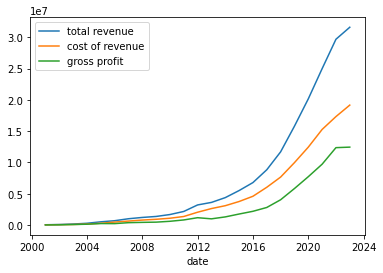

In [ ]:
revenue.plot(x='date', y=['total revenue', 'cost of operation', 'gross profit'], title='Netflix Revenue', xlabel= "Date", ylabel="USD").invert_xaxis()

The importance of the curvature of these lines cannot be overstated. Despite bringing in billions of dollars annually, the total revenue slowly starts to climb less drastically, while the cost of operation continues to grow steadily. As the cost of running the company rises more dramatically than the money coming in, we see that the gross profit starts to plateau. 

What we have learned here is that between 2021 and 2022, Netflix began to see stagnating profits. However, the company still brings in billions of dollars yearly. Perhaps this wouldn't be an issue for a private company, but for a publically traded company like Netflix, this is unaceptable. 

(Note the "1e7" on the top left of the graph. As we are working with very large numbers, the total number is instead represented in the more easily read scientific notation.)

<AxesSubplot:xlabel='date'>

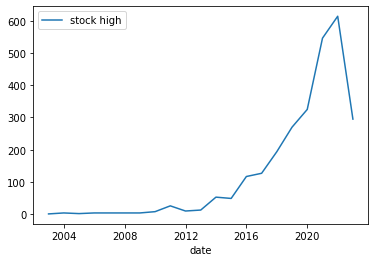

In [ ]:
stock.plot(x='date', y='market cap', title='Netflix Market Cap', xlabel= "Date", ylabel="USD").invert_xaxis()

The above graph charts only the value of Netflix's market cap throughout the years. As visualized by the graph, between the years 2021 and 2022 there is a drastic drop in the value of the market cap, dropping by just over 50%. This change takes place within the same calendar year as the stagnating profits.

<AxesSubplot:xlabel='date'>

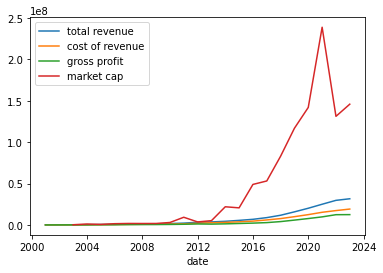

In [ ]:
df.plot(x='date', y=['total revenue', 'cost of operation', 'gross profit', 'market cap'], title='Netflix Revenue and Market Cap', xlabel= "Date", ylabel="USD",).invert_xaxis()

Finally, using our combined data frame, we can see both the rise and stagnation of the profits along with the drastic drop in the total stock value. The correlation between the plateauing profits and plummeting market cap is evident. 

Was Netflix's password sharing crackdown a response to its lessening profits and dramatic drop in value? While correlation does not equate to causation, I believe that we can safely assume this is at least partially the case. What this analysis does not tell us is why Netflix saw such drastic losses in the early 2020s. Ultimately, however, the cause of the change is irrelevant. As the purpose of this project was to determine what may lead Netflix to consider a move so unpopular with thier base, upon discovering Netflix's financial losses of the last few years I believe we have adequately answered our initial question. 